# Project_Part_1_Models


In [1]:
import pip
pip.main(['install', 'yellowbrick'])

# from yellowbrick.classifier import ROCAUC


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [2]:
# load libraries
import pandas as pd
import numpy as np

#model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt

## Import data:

In [3]:
data_original=pd.read_csv("DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv")

data_original.info

<bound method DataFrame.info of              DESYNPUF_ID  BENE_BIRTH_DT  BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
0       00013D2EFD8E45D1       19230501            NaN                  1   
1       00016F745862898F       19430101            NaN                  1   
2       0001FDD721E223DC       19360901            NaN                  2   
3       00021CA6FF03E670       19410601            NaN                  1   
4       00024B3D2352D2D0       19360801            NaN                  1   
...                  ...            ...            ...                ...   
114533  FFFD7C464C94D136       19430701            NaN                  2   
114534  FFFE3ED9582AD46E       19160601            NaN                  2   
114535  FFFE7AB5D7F1725D       19390401            NaN                  2   
114536  FFFF29A2E1362059       19110701            NaN                  1   
114537  FFFF7C107A4E385A       19520401            NaN                  2   

        BENE_RACE_CD BENE_ESRD_IND  SP_STAT

2    86453
1    28085
Name: SP_DEPRESSN, dtype: int64

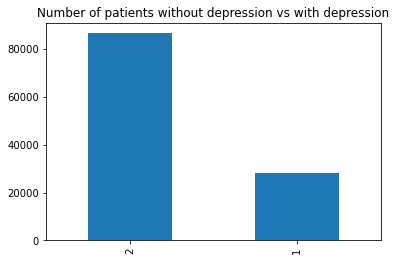

In [4]:
# View data class: imbalanced data

depression_counts=data_original.SP_DEPRESSN.value_counts()
depression_counts.plot(kind='bar',
                       title="Number of patients without depression vs with depression")
depression_counts

<p style='font-size: 18px' > According to the above figure, we can clearly find that our data is unbalanced.</p>

# Columns - Total 32 columns

In [5]:
# drop the records where the patient is already dead
data_original.drop(data_original[data_original['BENE_DEATH_DT']>0].index, inplace=True)

NumExpr defaulting to 8 threads.


In [6]:
# Calculate AGE
import datetime as dt

# 1. convert birthdate column to datetime Year-month-date
data_original['BENE_BIRTH_DT']=pd.to_datetime(data_original["BENE_BIRTH_DT"], format='%Y%m%d')

# 2. insert a column 01-01-2009, convert it to datetime
data_original['beneficiary_date']='01-01-2009'
data_original['beneficiary_date']=pd.to_datetime(data_original['beneficiary_date'])

# 3. calculate AGE and convert the result to 'year'
data_original['AGE']=data_original['beneficiary_date']-data_original['BENE_BIRTH_DT']
data_original['AGE']=data_original['AGE'].astype('timedelta64[Y]').astype('int')
data_original

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,beneficiary_date,AGE
0,00013D2EFD8E45D1,1923-05-01,NaN,1,1,0,26,950,12,12,...,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,2009-01-01,85
1,00016F745862898F,1943-01-01,NaN,1,1,0,39,230,12,12,...,3204.0,0.0,60.0,70.0,0.0,1350.0,530.0,100.0,2009-01-01,66
2,0001FDD721E223DC,1936-09-01,NaN,2,1,0,39,280,12,12,...,0.0,0.0,30.0,50.0,0.0,20.0,0.0,0.0,2009-01-01,72
3,00021CA6FF03E670,1941-06-01,NaN,1,5,0,6,290,12,12,...,0.0,0.0,0.0,0.0,0.0,90.0,10.0,0.0,2009-01-01,67
4,00024B3D2352D2D0,1936-08-01,NaN,1,1,0,52,590,12,12,...,0.0,0.0,90.0,40.0,0.0,410.0,140.0,0.0,2009-01-01,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114533,FFFD7C464C94D136,1943-07-01,NaN,2,1,0,54,0,12,12,...,0.0,0.0,0.0,0.0,0.0,200.0,40.0,0.0,2009-01-01,65
114534,FFFE3ED9582AD46E,1916-06-01,NaN,2,1,0,6,150,12,12,...,1068.0,0.0,3240.0,1390.0,0.0,2510.0,620.0,0.0,2009-01-01,92
114535,FFFE7AB5D7F1725D,1939-04-01,NaN,2,1,0,23,490,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-01,69
114536,FFFF29A2E1362059,1911-07-01,NaN,1,1,0,29,20,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-01,97


In [7]:
# Assign AGE group
# 1. Discretize variable into equal-sized buckets 
group_names=['under_65', '65to70', '70to76', '76to82','over82']
data_original["AGE"] = pd.qcut(data_original["AGE"],5, labels=group_names)

In [8]:
# 2. Drop columns 'BENE_BIRTH_DT', 'BENE_DEATH_DT' and 'beneficiary_date'
data_original=data_original.drop(['BENE_BIRTH_DT', 'beneficiary_date', 'BENE_DEATH_DT'],axis=1)

# 2. View df
data_original.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,AGE
0,00013D2EFD8E45D1,1,1,0,26,950,12,12,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,over82
1,00016F745862898F,1,1,0,39,230,12,12,0,10,...,36000.0,3204.0,0.0,60.0,70.0,0.0,1350.0,530.0,100.0,65to70
2,0001FDD721E223DC,2,1,0,39,280,12,12,0,12,...,0.0,0.0,0.0,30.0,50.0,0.0,20.0,0.0,0.0,70to76
3,00021CA6FF03E670,1,5,0,6,290,12,12,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,90.0,10.0,0.0,65to70
4,00024B3D2352D2D0,1,1,0,52,590,12,12,2,8,...,0.0,0.0,0.0,90.0,40.0,0.0,410.0,140.0,0.0,70to76


In [9]:
# Age group: dummy variable
dum_df_age = pd.get_dummies(data_original["AGE"])
# merge with main df on key values
data_1= pd.concat([data_original, dum_df_age], axis=1)
# drop AGE column because we have dummy variable columns
data_1=data_1.drop(["AGE"], axis=1)
# drop one dummy variable 'over82'
data_1=data_1.drop(["over82"], axis=1)
data_1

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,under_65,65to70,70to76,76to82
0,00013D2EFD8E45D1,1,1,0,26,950,12,12,12,12,...,0.0,0.0,0.0,100.0,20.0,0.0,0,0,0,0
1,00016F745862898F,1,1,0,39,230,12,12,0,10,...,60.0,70.0,0.0,1350.0,530.0,100.0,0,1,0,0
2,0001FDD721E223DC,2,1,0,39,280,12,12,0,12,...,30.0,50.0,0.0,20.0,0.0,0.0,0,0,1,0
3,00021CA6FF03E670,1,5,0,6,290,12,12,0,12,...,0.0,0.0,0.0,90.0,10.0,0.0,0,1,0,0
4,00024B3D2352D2D0,1,1,0,52,590,12,12,2,8,...,90.0,40.0,0.0,410.0,140.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114533,FFFD7C464C94D136,2,1,0,54,0,12,12,0,12,...,0.0,0.0,0.0,200.0,40.0,0.0,1,0,0,0
114534,FFFE3ED9582AD46E,2,1,0,6,150,12,12,0,12,...,3240.0,1390.0,0.0,2510.0,620.0,0.0,0,0,0,0
114535,FFFE7AB5D7F1725D,2,1,0,23,490,12,12,11,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
114536,FFFF29A2E1362059,1,1,0,29,20,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [10]:
# 2. Race
data_1['BENE_RACE_CD'].replace({1:"White", 2:"Black", 3:"Other", 5:"Hispanic"}, inplace=True)
dum_df = pd.get_dummies(data_1["BENE_RACE_CD"],prefix="RACE")

# merge with main df on key values:
data_1 = pd.concat([data_1, dum_df], axis=1)
# drop one dummy variable:
data_2=data_1.drop(["BENE_RACE_CD","RACE_White"], axis=1)
data_2

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,...,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,under_65,65to70,70to76,76to82,RACE_Black,RACE_Hispanic,RACE_Other
0,00013D2EFD8E45D1,1,0,26,950,12,12,12,12,2,...,100.0,20.0,0.0,0,0,0,0,0,0,0
1,00016F745862898F,1,0,39,230,12,12,0,10,1,...,1350.0,530.0,100.0,0,1,0,0,0,0,0
2,0001FDD721E223DC,2,0,39,280,12,12,0,12,2,...,20.0,0.0,0.0,0,0,1,0,0,0,0
3,00021CA6FF03E670,1,0,6,290,12,12,0,12,2,...,90.0,10.0,0.0,0,1,0,0,0,1,0
4,00024B3D2352D2D0,1,0,52,590,12,12,2,8,1,...,410.0,140.0,0.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114533,FFFD7C464C94D136,2,0,54,0,12,12,0,12,2,...,200.0,40.0,0.0,1,0,0,0,0,0,0
114534,FFFE3ED9582AD46E,2,0,6,150,12,12,0,12,2,...,2510.0,620.0,0.0,0,0,0,0,0,0,0
114535,FFFE7AB5D7F1725D,2,0,23,490,12,12,11,12,2,...,0.0,0.0,0.0,0,1,0,0,0,0,0
114536,FFFF29A2E1362059,1,0,29,20,6,0,0,0,2,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [11]:
# change 2 with 0: 12 columns need to be changed

In [12]:
data_2['BENE_SEX_IDENT_CD'].replace({2:0}, inplace=True)
data_2['SP_ALZHDMTA'].replace({2:0}, inplace=True)
data_2['SP_CHF'].replace({2:0}, inplace=True)
data_2['SP_CHRNKIDN'].replace({2:0}, inplace=True)
data_2['SP_CNCR'].replace({2:0}, inplace=True)
data_2['SP_COPD'].replace({2:0}, inplace=True)
data_2['SP_DIABETES'].replace({2:0}, inplace=True)
data_2['SP_ISCHMCHT'].replace({2:0}, inplace=True)
data_2['SP_OSTEOPRS'].replace({2:0}, inplace=True)
data_2['SP_RA_OA'].replace({2:0}, inplace=True)
data_2['SP_STRKETIA'].replace({2:0}, inplace=True)
data_2['SP_DEPRESSN'].replace({2:0}, inplace=True)

0    102066
1     10688
Name: BENE_ESRD_IND, dtype: int64

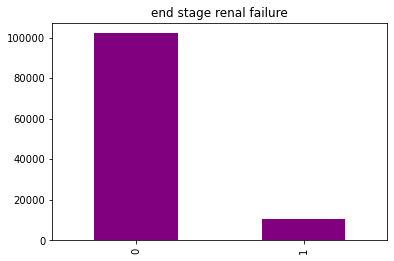

In [13]:
# 3. BENE_ESRD_IND:
#End-stage renal failure, also known as end-stage renal disease (ESRD), 
#is the final, permanent stage of chronic kidney disease, 
#where kidney function has declined to the point that the kidneys can 
#no longer function on their own. 

# replace 'Y' with '1'
data_2['BENE_ESRD_IND'].replace({'Y':1}, inplace=True)

# plot: 10688 patients have ESRD
data_2['BENE_ESRD_IND'].value_counts().plot(kind='bar',
                                           color='purple',
                                           title='end stage renal failure')
data_2['BENE_ESRD_IND'].value_counts()

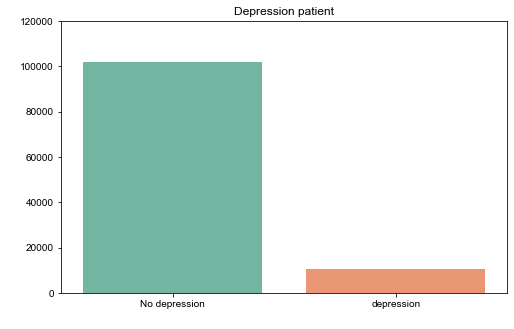

In [14]:
# check target balance or unbalance?
plt.title('Depression patient')
ax = sns.countplot(x = data_2['BENE_ESRD_IND'] ,palette="Set2")
sns.set(font_scale= 1.0)
ax.set_ylim(top = 120000)
ax.set_xticklabels(['No depression','depression'])
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,5)

plt.show()

In [15]:
# 4. SP_STATE_CODE:
# 5. BENE_COUNTY_CD

# Number of unique state code: 52
len(data_2["SP_STATE_CODE"].unique())

# Number of unique County code: 307
len(data_2["BENE_COUNTY_CD"].unique())

307

In [16]:
# drop the state and county code for now. 

data_2=data_2.drop(["SP_STATE_CODE", "BENE_COUNTY_CD"], axis=1)

In [17]:
# 6. BENE_HI_CVRAGE_TOT_MONS
# 7. BENE_SMI_CVRAGE_TOT_MONS
# 8. BENE_HMO_CVRAGE_TOT_MONS
# 9. PLAN_CVRG_MOS_NUM
data_2=data_2.drop(["BENE_HI_CVRAGE_TOT_MONS", "BENE_SMI_CVRAGE_TOT_MONS",
            "BENE_HMO_CVRAGE_TOT_MONS", "PLAN_CVRG_MOS_NUM" ], axis=1)


In [18]:
data_2.shape

(112754, 30)

In [19]:
# drop column 1, 24 to 32;

data=data_2.drop(["DESYNPUF_ID","MEDREIMB_IP", "BENRES_IP", "PPPYMT_IP","MEDREIMB_OP",
                 "BENRES_OP","PPPYMT_OP","MEDREIMB_CAR","BENRES_CAR","PPPYMT_CAR"], axis=1)

In [20]:
data.shape

(112754, 20)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112754 entries, 0 to 114537
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   BENE_SEX_IDENT_CD  112754 non-null  int64 
 1   BENE_ESRD_IND      112754 non-null  object
 2   SP_ALZHDMTA        112754 non-null  int64 
 3   SP_CHF             112754 non-null  int64 
 4   SP_CHRNKIDN        112754 non-null  int64 
 5   SP_CNCR            112754 non-null  int64 
 6   SP_COPD            112754 non-null  int64 
 7   SP_DEPRESSN        112754 non-null  int64 
 8   SP_DIABETES        112754 non-null  int64 
 9   SP_ISCHMCHT        112754 non-null  int64 
 10  SP_OSTEOPRS        112754 non-null  int64 
 11  SP_RA_OA           112754 non-null  int64 
 12  SP_STRKETIA        112754 non-null  int64 
 13  under_65           112754 non-null  uint8 
 14  65to70             112754 non-null  uint8 
 15  70to76             112754 non-null  uint8 
 16  76to82             1

In [22]:
# change data type: BENE_ESRD_IND column;
data["BENE_ESRD_IND"]=pd.to_numeric(data["BENE_ESRD_IND"])

In [23]:
# no missing values;
data.isnull().sum()

BENE_SEX_IDENT_CD    0
BENE_ESRD_IND        0
SP_ALZHDMTA          0
SP_CHF               0
SP_CHRNKIDN          0
SP_CNCR              0
SP_COPD              0
SP_DEPRESSN          0
SP_DIABETES          0
SP_ISCHMCHT          0
SP_OSTEOPRS          0
SP_RA_OA             0
SP_STRKETIA          0
under_65             0
65to70               0
70to76               0
76to82               0
RACE_Black           0
RACE_Hispanic        0
RACE_Other           0
dtype: int64

In [24]:
# Rearrange column
data = data[['BENE_SEX_IDENT_CD',
                 'BENE_ESRD_IND',
                 'SP_ALZHDMTA',
                 'SP_CHF',
                 'SP_CHRNKIDN',
                 'SP_CNCR',
                 'SP_COPD',
                 'SP_DIABETES',
                 'SP_ISCHMCHT',
                 'SP_OSTEOPRS',
                 'SP_RA_OA',
                 'SP_STRKETIA',
                 'under_65',
                 '65to70',
                 '70to76',
                 '76to82',
                 'RACE_Black',
                 'RACE_Hispanic',
                 'RACE_Other',
                 'SP_DEPRESSN']]
data

,BENE_SEX_IDENT_CD,BENE_ESRD_IND,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,under_65,65to70,70to76,76to82,RACE_Black,RACE_Hispanic,RACE_Other,SP_DEPRESSN
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114533,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
114534,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
114535,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
114536,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#randomly shuffle my df
data=data.sample(frac=1)

In [26]:
# Balance dataset with depression and without depression
arr_1 = data[data['SP_DEPRESSN'] == 1].sample(n = 5000)
arr_2 = data[data['SP_DEPRESSN'] == 0].sample(n = 5000)

frames = [arr_1, arr_2]
data = pd.concat(frames)
data=data.sample(frac=1)

In [27]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

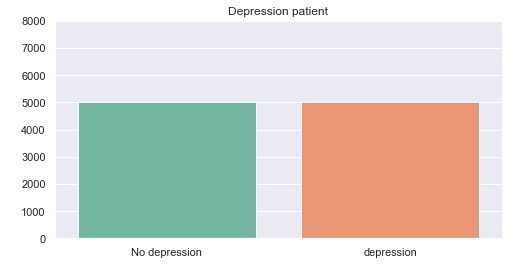

In [28]:
# check target balance or unbalance?
plt.title('Depression patient')
ax = sns.countplot(x = y ,palette="Set2")
sns.set(font_scale= 1.0)
ax.set_ylim(top =8000)
ax.set_xticklabels(['No depression','depression'])
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)

plt.show()

# Standardization

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

# Model - Logistic Regression

In [31]:
# load libary
# load library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import l1_min_c
from time import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path
from sklearn.model_selection import KFold, cross_val_score

In [32]:
lasso = linear_model.Lasso(alpha=0.03)
lasso_reg = lasso.fit(X_train, y_train)
lasso_reg.intercept_, lasso_reg.coef_

(0.3012639888586273,
 array([-0.        ,  0.        ,  0.05720754,  0.06813348,  0.00880537,
         0.        ,  0.00762956,  0.1571076 ,  0.1135569 ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.        , -0.        ,  0.        , -0.        ]))

In [33]:
l_predict = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, l_predict)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse    #Lower is better.
l_crossv = cross_val_score(lasso, X_train, y_train, cv=3)
print(cross_val_score(lasso, X_train, y_train, cv=3))
l_crossv.mean()
l_crossv.std()

[0.18285222 0.19933067 0.18679796]


0.007025167649459004

array([5.00000000e+00, 4.55581378e+00, 4.15108784e+00, 3.78231664e+00,
       3.44630605e+00, 3.14014572e+00, 2.86118383e+00, 2.60700414e+00,
       2.37540508e+00, 2.16438064e+00, 1.97210303e+00, 1.79690683e+00,
       1.63727458e+00, 1.49182362e+00, 1.35929412e+00, 1.23853818e+00,
       1.12850986e+00, 1.02825615e+00, 9.36908711e-01, 8.53676324e-01,
       7.77838072e-01, 7.08737081e-01, 6.45774833e-01, 5.88405976e-01,
       5.36133611e-01, 4.88504979e-01, 4.45107543e-01, 4.05565415e-01,
       3.69536102e-01, 3.36707533e-01, 3.06795364e-01, 2.79540509e-01,
       2.54706901e-01, 2.32079442e-01, 2.11462144e-01, 1.92676430e-01,
       1.75559587e-01, 1.59963357e-01, 1.45752653e-01, 1.32804389e-01,
       1.21006413e-01, 1.10256537e-01, 1.00461650e-01, 9.15369140e-02,
       8.34050269e-02, 7.59955541e-02, 6.92443186e-02, 6.30928442e-02,
       5.74878498e-02, 5.23807876e-02, 4.77274228e-02, 4.34874501e-02,
       3.96241449e-02, 3.61040451e-02, 3.28966612e-02, 2.99742125e-02,
      

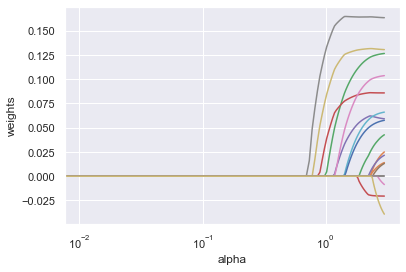

In [34]:
coefs = []
alphas = 10**np.linspace(1,-3,100)*0.5
alphas
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(-np.log10(alphas*2), coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
10**np.linspace(1,-3,100)*0.5

In [35]:
eps = 5e-2  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps, fit_intercept=True)

Computing regularization path using the lasso...


array([0.378     , 0.36673308, 0.35580198, 0.34519671, 0.33490754,
       0.32492506, 0.31524013, 0.30584387, 0.29672768, 0.28788322,
       0.27930237, 0.2709773 , 0.26290037, 0.25506418, 0.24746157,
       0.24008556, 0.23292941, 0.22598656, 0.21925065, 0.21271552,
       0.20637518, 0.20022382, 0.19425581, 0.18846569, 0.18284816,
       0.17739806, 0.17211042, 0.16698038, 0.16200325, 0.15717447,
       0.15248962, 0.14794441, 0.14353468, 0.13925639, 0.13510562,
       0.13107857, 0.12717156, 0.12338099, 0.11970342, 0.11613546,
       0.11267384, 0.10931541, 0.10605708, 0.10289587, 0.09982889,
       0.09685332, 0.09396645, 0.09116562, 0.08844828, 0.08581193,
       0.08325416, 0.08077263, 0.07836507, 0.07602927, 0.07376309,
       0.07156445, 0.06943135, 0.06736184, 0.065354  , 0.06340602,
       0.0615161 , 0.05968251, 0.05790357, 0.05617766, 0.05450319,
       0.05287863, 0.05130249, 0.04977334, 0.04828976, 0.0468504 ,
       0.04545395, 0.04409912, 0.04278467, 0.0415094 , 0.04027

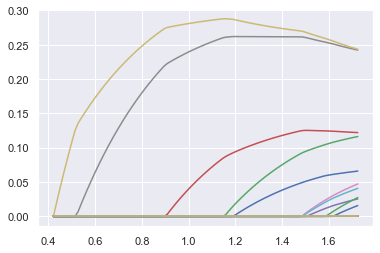

In [36]:
plt.figure()
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)
alphas_lasso

In [37]:
# building model with lasso and handing imbalanced Classes
logmodel = LogisticRegression(
    penalty='l1', multi_class="auto",
    solver='liblinear')

logmodel.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


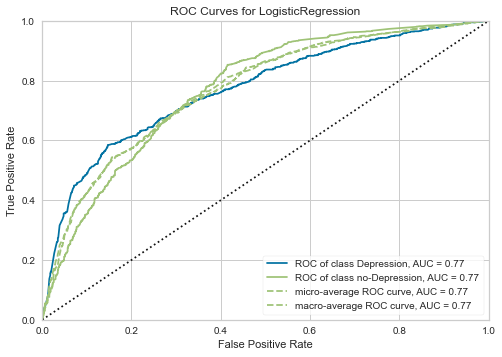

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logmodel, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [39]:
# Probability estimates. The returned estimates for all classes are ordered by the label of classes.
predictions = logmodel.predict(X_test)
y_scores = logmodel.predict_proba(X_test)[:,1]

In [40]:
# check CFM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('roc_auc_score for the Logistic regression model: ', roc_auc_score(y_test, y_scores))

[[713 287]
 [325 675]]


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1000
           1       0.70      0.68      0.69      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

roc_auc_score for the Logistic regression model:  0.771938


In [41]:
# Return the mean accuracy on the given test data and labels.
logmodel.score(X_test, y_test)

0.694

In [42]:
from sklearn.model_selection import KFold
def run_kfold(logmodel): 
    kf = KFold(n_splits=5) 
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X): 
        fold += 1
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index] 
        logmodel.fit(X_train, y_train)
        accuracy_logmodel = logmodel.score(X_test, y_test)*100 
        outcomes.append(accuracy_logmodel)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_logmodel)) 
    mean_outcome_logmodel = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_logmodel)) #KFold cross validation return
    return(mean_outcome_logmodel)
    
DT_Kfoldscore=run_kfold(logmodel)

Fold 1 accuracy: 69.95
Fold 2 accuracy: 70.25
Fold 3 accuracy: 70.15
Fold 4 accuracy: 71.39999999999999
Fold 5 accuracy: 70.39999999999999
Mean Accuracy: 70.42999999999999


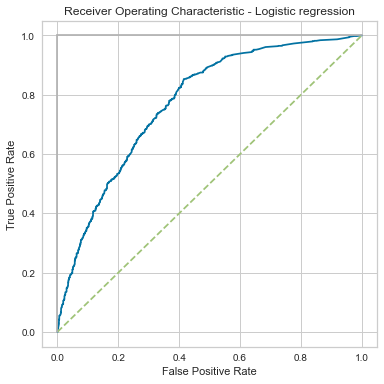

In [43]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Model - decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0) 
decision_tree.fit(X_train, y_train)
predict_dt=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test, y_test) * 100
y_scores = decision_tree.predict_proba(X_test)[:,1]
print('roc_auc_score for the Decision tree model: ', roc_auc_score(y_test, y_scores))
decision_tree_score

roc_auc_score for the Decision tree model:  0.654267


64.35

### K-fold cross validation: decision tree

In [45]:
from sklearn.model_selection import KFold
def run_kfold(decision_tree): 
    kf = KFold(n_splits=5) 
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X): 
        fold += 1
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index] 
        decision_tree.fit(X_train, y_train)
        accuracy_decision_tree = decision_tree.score(X_test, y_test)*100 
        outcomes.append(accuracy_decision_tree)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_decision_tree)) 
    mean_outcome_decision_tree = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_decision_tree)) #KFold cross validation return(mean_outcome_decision_tree)
    return(mean_outcome_decision_tree)
    
DT_Kfoldscore=run_kfold(decision_tree)

Fold 1 accuracy: 65.8
Fold 2 accuracy: 63.3
Fold 3 accuracy: 65.3
Fold 4 accuracy: 65.10000000000001
Fold 5 accuracy: 64.85
Mean Accuracy: 64.87


### Confusion Matrix - decision tree

[[711 289]
 [424 576]]


(2.5, -0.5)

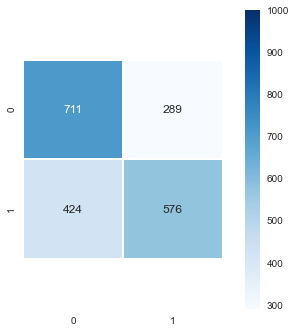

In [46]:
results_dt = confusion_matrix(y_test, predict_dt) 
print(results_dt) 
ax=sns.heatmap(results_dt,linewidths=1,vmax=1000,square=True, cmap="Blues",annot=True, fmt='g') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Precision, Recall, F1 - decision tree

In [47]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      1000
           1       0.67      0.58      0.62      1000

    accuracy                           0.64      2000
   macro avg       0.65      0.64      0.64      2000
weighted avg       0.65      0.64      0.64      2000



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


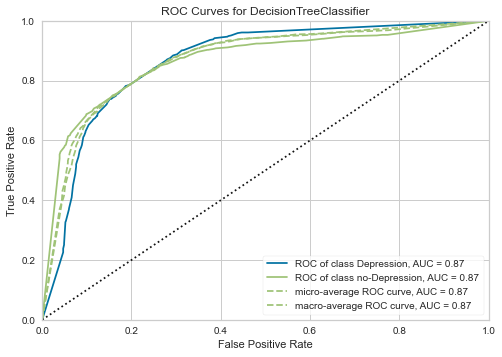

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(decision_tree, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

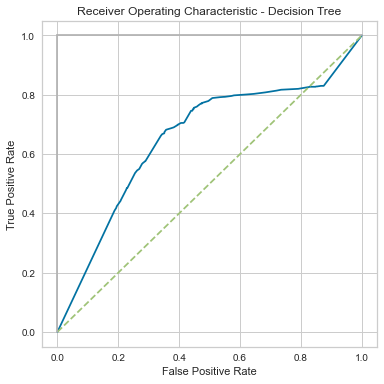

In [49]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Model - Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB 
nb_Classifier_Object = GaussianNB() 

nb_Classifier_Object.fit(X_train, y_train) 
predict_nb=nb_Classifier_Object.predict(X_test) 
NB_score=nb_Classifier_Object.score(X_test,y_test)*100 
y_scores = nb_Classifier_Object.predict_proba(X_test)[:,1]
print('roc_auc_score for the NB model: ', roc_auc_score(y_test, y_scores))
NB_score

roc_auc_score for the NB model:  0.7636750000000001


69.0

In [51]:
#NB: k-fold cross validation
def run_kfold(nb_Classifier_Object): 
    kf = KFold(n_splits=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X): 
        fold += 1
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index] 
        nb_Classifier_Object.fit(X_train, y_train)
        accuracy_nb = nb_Classifier_Object.score(X_test, y_test)*100 
        outcomes.append(accuracy_nb)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_nb)) 
    mean_outcome_nb = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_nb)) #KFold cross validation 
    return(mean_outcome_nb)

nb_Kfoldscore=run_kfold(nb_Classifier_Object)

Fold 1 accuracy: 69.5
Fold 2 accuracy: 68.2
Fold 3 accuracy: 69.95
Fold 4 accuracy: 69.89999999999999
Fold 5 accuracy: 69.85
Mean Accuracy: 69.47999999999999


[[748 252]
 [368 632]]


(2.5, -0.5)

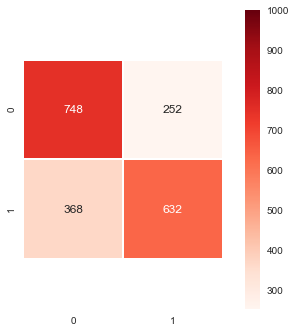

In [52]:
results_nb = confusion_matrix(y_test, predict_nb) 
print(results_nb) 
ax=sns.heatmap(results_nb,linewidths=1,vmax=1000,square=True, cmap="Reds",annot=True, fmt='g') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


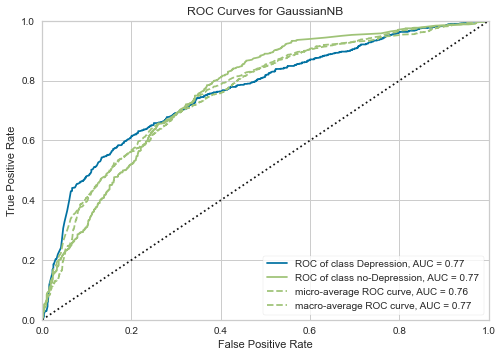

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(nb_Classifier_Object, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

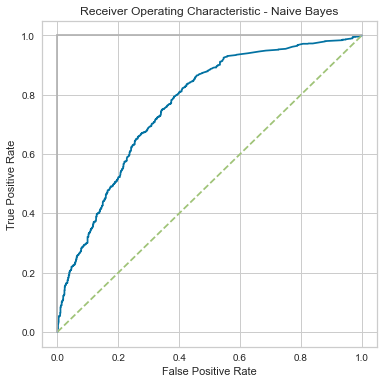

In [54]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Precision, Recall, F1 - naive bayes

In [55]:
print(classification_report(y_test, predict_nb))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.71      0.63      0.67      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



# Model - SVM

In [56]:
# Train SVM model
from sklearn import svm, metrics

clf = svm.SVC(kernel = 'linear', C = 1,  gamma=0.1, probability= True)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:,1]
print('roc_auc_score for the SVM_linear model: ', roc_auc_score(y_test, y_scores))
print(metrics.classification_report(y_test,y_pred))

roc_auc_score for the SVM_linear model:  0.75241
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1000
           1       0.67      0.68      0.67      1000

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


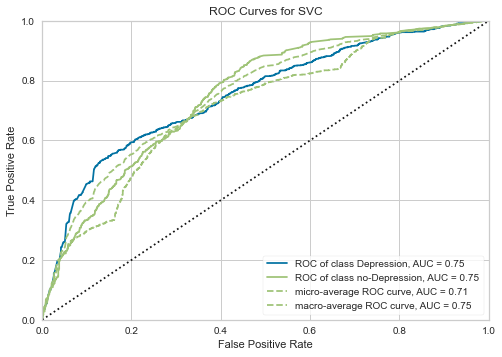

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

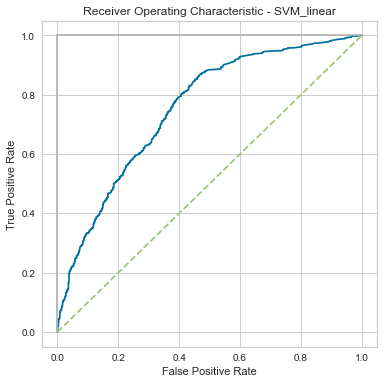

In [58]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - SVM_linear')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [59]:
# Change best 'C'
# Train SVM model
from sklearn import svm, metrics

grid = svm.SVC(kernel = 'rbf', C = 1,  gamma=0.1, probability= True)
grid.fit(X_train,y_train)

y_pred = grid.predict(X_test)
y_scores = grid.predict_proba(X_test)[:,1]
print('roc_auc_score for the SVM_kernel model: ', roc_auc_score(y_test, y_scores))
print('\n')
print(metrics.classification_report(y_test,y_pred))

roc_auc_score for the SVM_kernel model:  0.7576820000000001


              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1000
           1       0.67      0.79      0.73      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


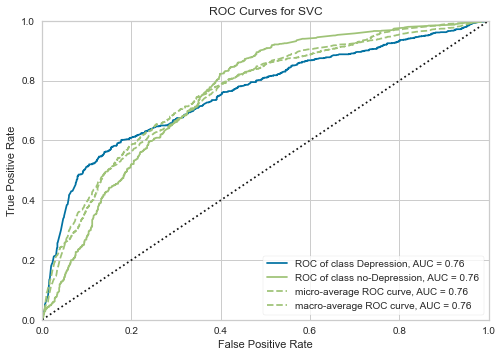

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(grid, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

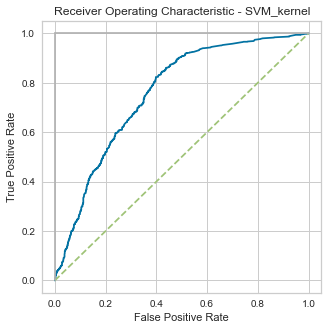

In [61]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - SVM_kernel')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Feature Selection - BE

In [62]:
#model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt 

## Feature and Target

## Feature selection - backward elimination 

In [63]:
# import statsmodels.api as sm

# def backward_elimination(data, target,significance_level = 0.05):
#     features = data.columns.tolist()
#     while(len(features)>0):
#         features_with_constant = sm.add_constant(data[features])
#         p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
#         max_p_value = p_values.max()
#         if(max_p_value >= significance_level):
#             excluded_feature = p_values.idxmax()
#             features.remove(excluded_feature)
#         else:
#             break 
#     return features

## selected features after BE

In [64]:
# #randomly shuffle my df
# data=data.sample(frac=1)
# # X=data.iloc[:,:-1].values
# # y=data.iloc[:,-1].values
# X = data.drop(['SP_DEPRESSN'],axis=1)
# y = data['SP_DEPRESSN'] 
# backward_elimination(X, y)

In [65]:
# # There are 3 columns being eliminated
# # assign new column to X
# X_BE=data[['BENE_SEX_IDENT_CD',
#  'BENE_ESRD_IND',
#  'SP_ALZHDMTA',
#  'SP_CHF',
#  'SP_CHRNKIDN',
#  'SP_CNCR',
#  'SP_COPD',
#  'SP_DIABETES',
#  'SP_ISCHMCHT',
#  'SP_OSTEOPRS',
#  'SP_RA_OA',
#  'SP_STRKETIA',
#  'under_65',
#  '65to70',
#  '70to76',
#  '76to82']].values

In [66]:
# y_BE=data.iloc[:,-1].values

## Standardization

In [67]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_X = sc_X.fit_transform(X_BE)

## Split data

In [68]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test=train_test_split(X_BE, y_BE, test_size=0.20)

In [69]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifierObj.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=5)
print(modelAccuracies.mean())
print(modelAccuracies.std())

0.6813750000000001
0.01077758089739992


In [71]:
y_pred = classifierObj.predict(X_test)
y_scores = classifierObj.predict_proba(X_test)[:,1]
print('roc_auc_score for the KNN model: ', roc_auc_score(y_test, y_scores))
print('\n')
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

roc_auc_score for the KNN model:  0.7190714999999999




/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


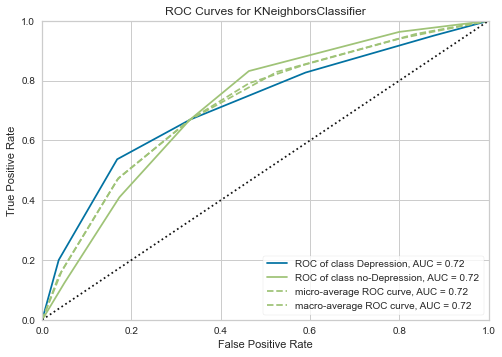

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(classifierObj, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

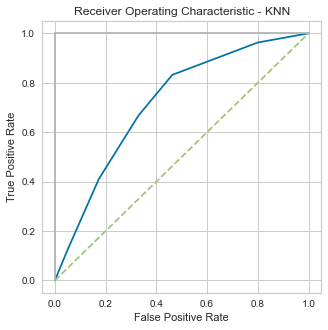

In [73]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- Three Cells above is KNN code for single K value (k = 5) with its CV. 
- But, we may want to determine which K value will be the best 
- That is shown below. 
- Please refer to the template I shared

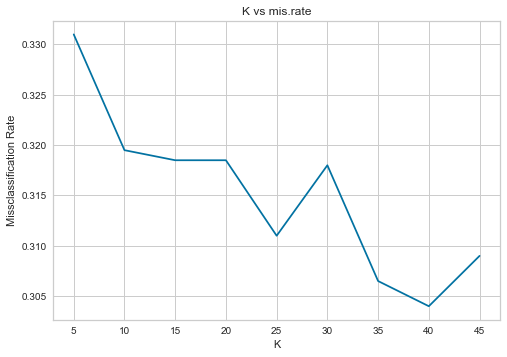

The lowset misclassification rate for KNN is  0.30400000000000005
Its corresponding K value is  40


In [74]:
from sklearn.neighbors import KNeighborsClassifier

# Create two lists that contain K values and its corresponding misclassification rates (empty for now)
k_values = [i*5 for i in range(1,10)]
errors = []

# Dictionay to map values in errors to k (empty for now)
# key for mis_rate, value for corresponding K
mydict = {}

# create a for loop to run k values in k_values list
for k in k_values:
    classifierObj = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    classifierObj.fit(X_train, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)
    
    # Getting mis.rate 
    accuracy = classifierObj.score(X_test,y_test)
    misclassification_rate = 1 - accuracy
    
    #Appending mis.rate to errors list and dictionary
    errors.append(misclassification_rate)
    mydict[misclassification_rate] = k

# Getting lowest value of testing error and the corresponding value of K    
lowest_error = min(errors)
lowest_k = mydict[lowest_error]

# plotting K vs mis_rate over a range of K's
plt.plot(k_values,errors)
plt.xlabel("K")
plt.ylabel("Missclassification Rate")
plt.title("K vs mis.rate")
plt.show()


# Getting predicted y values based on the lowest K. 
classifierObj = KNeighborsClassifier(n_neighbors= lowest_k, p=2, metric='minkowski')
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

print("The lowset misclassification rate for KNN is ", lowest_error)
print("Its corresponding K value is ", lowest_k)


## Ensemble Voting Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [76]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [77]:
eclf =  VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft',
        flatten_transform=True)
eclf = eclf.fit(X_train, y_train)
eclf_pre = eclf.predict(X_test)
y_scores = eclf.predict_proba(X_test)[:,1]
print('roc_auc_score for the KNN model: ', roc_auc_score(y_test, y_scores))
print('\n')

roc_auc_score for the KNN model:  0.765431




In [78]:
print(classification_report(y_test, eclf_pre))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1000
           1       0.71      0.65      0.68      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


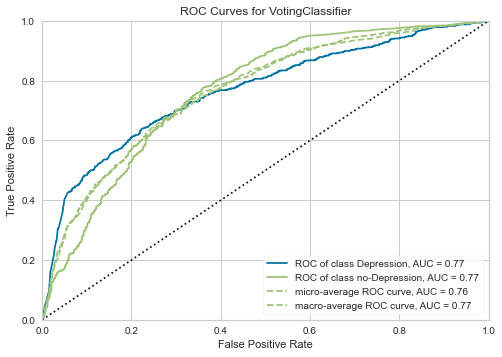

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [79]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(eclf, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

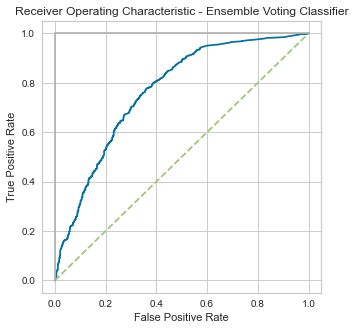

In [80]:
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_scores)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Ensemble Voting Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

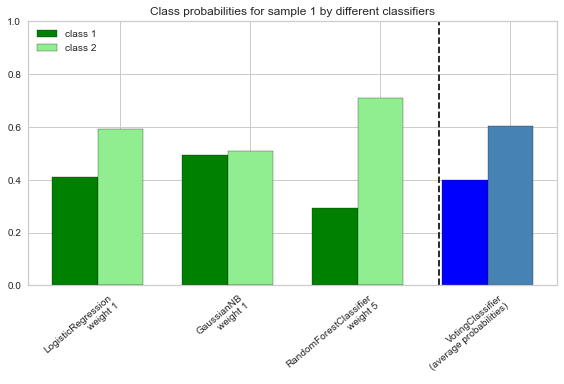

In [81]:
# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()

### Feature transformations with ensembles of trees

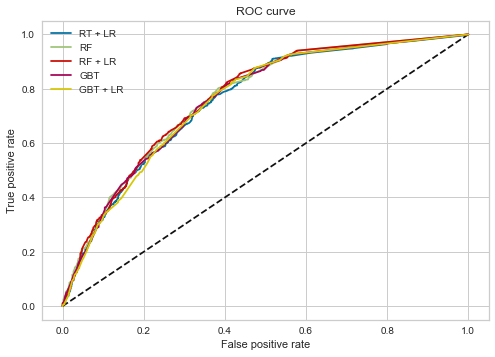

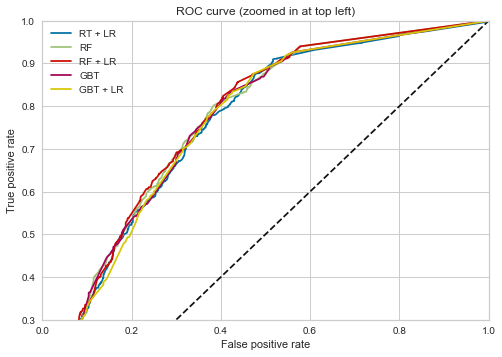

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


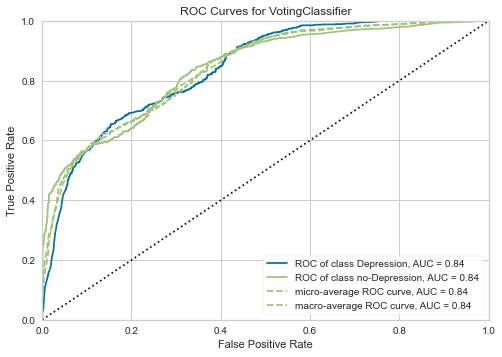

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [82]:
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

n_estimator = 10
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 1)
plt.ylim(0.3, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(eclf, classes=["Depression", "no-Depression"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure